<a href="https://colab.research.google.com/github/johnbeasley1998/NINEworkshop/blob/master/Tutorial_FITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style = "text-align:center; color:black";> FITS FILE TUTORIAL </h1>

<h2 style="text-align:left; color:SeaGreen";> Table of Contents </h2> 

1. [File Extensions](#one)

2. [Description of Fits Files](#two)

3. [VLASS and Downloading FITS Files](#three)

4. [Objectives and Imports](#four)

5. [Opening a FITS FILE](#five)

6. [World Coordinate System](#six)
   
7. [Displaying FITS Image](#seven) 
    <br> 7.1 [Matplotlib](#seven1)
    <br> 7.2 [AplPy](#seven2)






<h2 style="color:SeaGreen"> File Extensions </h2> 
<a id="one"></a>

<p style="text-indent: 50px; font-size:16px;"> Not all files are created equal in computing. For the computer to properly store and retrieve any file it must know how to encode the file and interact with it. More simply, all data is at some point 1's and 0's... for the computer to use these 1's and 0's in a meaningful way it must use what we call a 'file format' or 'extension'. You've likely seen these many times before following your file names: doc,pdf,jpeg, png, even gifs are just file extentions that signal to the computer to display file.doc as your homework and file.gif as a moving image of a cat doing something funny. This tutorial is going to be on the file extension used by astronomers to store data, <u><b>FITS files</b></u>. It will cover, <u><b>what</b></u> they are, <u><b>why</b></u> they are used, and <u><b>how</b></u> to download and display a fits file right here on this Jupyter Notebook. 

<h2 style="color:SeaGreen"> Description of Fits Files </h2> 
<a id="two"></a>

<p style="text-indent: 50px; font-size:16px;"> Fits Stands for 'Flexible Image Transport System'. Flexible is the keyword in its title, and certainly not image, as <b><u>fits are used to handle and describe many different types of data and not always images</u></b>. FITS was designed (by astronomers) with astronomers in mind in order to <u><b>conviently store and trade astronomical data</b></u>; due to n-dimensional nature of space imaging, astronomical data can come in 1-D Spectra up to 3 (or more) dimensional cubes. <u><b>FITS can handle all these different dimensions of arrays, and comes with a complex header to describe any other associated variables.</b></u> This flexiblity, coupled with FITS' excellent archivability, makes it a standard for storing and analyzing astronomical data. <b><u>In this tutorial we will be using FITS files from the NRAO VLA Sky Survey.</u></b> These FITS images can be downloaded opened, and analyzed right in this notebook. <b><u> This tutorial can be used as a baseline refrence to opening and parsing data from this useful, univseral file type</u></b>. </p>  

<p style="text-indent: 50px; font-size:16px;"> The creation of FITS files is somewhat mysterious, and dates back to the 1970s. It was, in fact, created by NRAO for the purposes described above. Below you will be able to find <b><u>the earliest possible mention of it I could find on the internet</u></b>. Its a couple page article on page ~300 of an Astronomical publication from 1980. In it, it describes fits and its use as they saw it in 1980. It is written in part by Eric W. Greisen, an NRAO Scientist.</p>

[This link](http://articles.adsabs.harvard.edu/full/seri/A+AS./0044//0000363.000.html)  will take go to page 363 of that exact article so you can see for yourself.


<h2 style="color:SeaGreen"> VLASS and Downloading FITS Files</h2> 
<a id="three"></a>

In [ ]:
#will display wikipedia
from IPython.display import IFrame
IFrame('https://science.nrao.edu/vlass', width=1000, height=500, border=12)

<p style="text-indent: 50px; font-size:16px;"> Above, you can find the VLA Sky Survey portion of the NRAO site. What is not mentioned on the site is that <b><u>the array of telescopes used to carry out VLASS return the data in the form of FITS Files</u></b>. This specific Sky Survey will cover 80% of the sky over the course of several years. <b><u> The skills that will be documented in this notebook can give ease to accesing analyzing a giant amount of astronomical data at an industry level. </u></b> The FITS file download can be found below.</p>

<h2 style="color:SeaGreen">Objectives & Imports</h2> 
<a id="four"></a>

<p style="text-indent: 50px; font-size:16px;">Now that our FITS file is downloaded, lets open it up with Python. <b><u>First we need to import the necessary python libraries that will accomplish our objectives</u></b>. Before importing its always a good idea to remind yourself what those objectives are so that you can import only the correct library and packages. </p.

<br> <h3 style="color:LightSeaGreen"> Our objectives are: </h3>
- Open the VLASS FITS file and look at the HEADER and DATA
- Extract the raw data from the FITS file
- Use the information found in the header to make a world coordinate system 
- Create a 'World Array' of coordinates 
- Use the WCS t convert the world array to pixels on the image.
- Create a cut out
- Plot the Image (two ways)

In [ ]:
#imports
#Installing Astropy
#!pip install astropy
#Installing ApplePy  #One of the methods used to display the FITS IMAGE
#!pip install aplpy 

from astropy.io import fits #Importing the Fits file reader from astropy. Used to open and read the header and data
from astropy import wcs     #Importing the World Cooridnate System

import os
import numpy as np               #Always im
import matplotlib.pyplot as plt
import aplpy
import matplotlib

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)



# for image links: uc?export=view&id=

<h2 style="color:SeaGreen"> Opening FITS File </h2> 
<a id="five"></a>

<p style="text-indent: 50px; font-size:16px;"> Time to use the fits file we downloaded. <b><u> We need to open it up with Astropy's built in FITS file explorer</u></b>. Once the FITS file is in the Python Enviroment, we can beging to look at and modify the FITS image. <b><u> Astropy has built in functions that will allow us to
    see the HEADER data</u></b> .... Finally, we need to <b><u>extract the raw data from inside so that we can use that to create our image</u></b>. </p>

In [ ]:
#read from directory
dir = '/srv/data/my_shared_data_folder/fits/'
VFIT = dir+'LASSIE.fits'

#open fits and extract data 
fits.info(VFIT)
hdu = fits.open(VFIT)
VFIT_raw = fits.getdata(VFIT)[0,0,:,:]


FileNotFoundError: ignored

In [ ]:
#display full fits image 

fig = plt.figure(facecolor='w', edgecolor='w', frameon=True, figsize=(20,18))
pt = aplpy.FITSFigure(VFIT, figure=fig)

pt.show_colorscale(cmap='magma', vmin=-.0001, vmax=0.0008)
pt.add_grid()
pt.grid.show()
pt.set_title(os.path.basename(VFIT))

fig.canvas.draw()


NameError: ignored

<Figure size 1440x1296 with 0 Axes>

<h2 style="color:SeaGreen"> World Coordinate System </h2> 
<a id="six"></a>

<p style="text-indent: 50px; font-size:16px;">The next task is to create a world coordinate system. Images that we can see with our eye are made up of pixels on a giant 2D array. <b><u> To convert data from a FITS file to a 2D image you must make use of a pixel-to-world coordinate system</u></b>. More simply, you have to map out each pixel on the image to correspond with a certain distance in space, and if you do it according to cooridnates you already know, the image should return any galatic phenomena that are present in the image.  </p>

<p style="text-indent: 50px; font-size:16px;"> <b><u>The units we will be corresponding to our pixels are Right Ascention and Declenation</u></b>. Essentially these are units like latitiude or longitude but used to map out locations in the enire galaxy. There is a short video explination below, but <b><u>just know that the variables RA and DEC are used to locate objects in the galaxy</u></b>. For our image today, we have a very specific RA and DEC of a Galaxy we will investigate, so those variables will be given. Half-With will be used to make a cutout of the retuned image so that it only displays the galaxy at hand. </p>

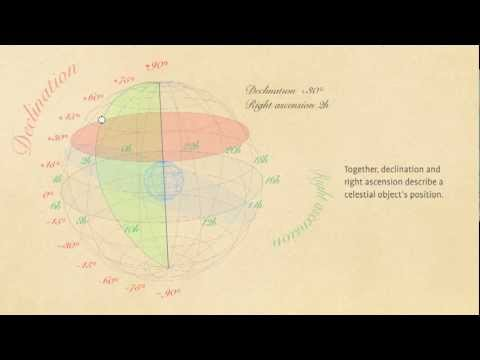

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('0RqDUOSf4ts', width=1000, height=500)

In [ ]:
# GIVEN VARIABLES are for the position of the galaxy -------------------------------
RA =   ( 10.0 +33.0/60.0  +50.00/3600.0) * 15.0
DEC = -(25.0 +37.0/60.0 +00.00/3600.0)
HALF_Width = 148  #(92 pixels is approx. 1.5 arcminutes)

<p style="text-indent: 50px; font-size:16px;">The next step is to create the actual coordinate system. Once this is done, we can also create a coordinate array of the world. These two things will come together to map RA and DEC values to pixels on an image in the third section. 

In [ ]:
#Create coordinates for the world, and put them in an array
w = wcs.WCS(hdu[0].header)

#Create world array 
worldarray = np.array([[RA, DEC, 0.0, 0.0]], np.float_)
print(worldarray)

#Combine World Array and WCS 
Pixel_Coord = w.wcs_world2pix(worldarray,1)
x = int(round(Pixel_Coord[0][1]))
y = int(round(Pixel_Coord[0][0]))


<p style="text-indent: 50px; font-size:16px;"> The final step in creating the cooridnate image display would be to make a cutout. <b><u> A cutout sizes the image that you will see</u></b> based on the 'Half_Width' variable seen up above. This variable uses pixels which now represent RA and DEC values due to the previous code cell. We can create the cutout by taking the X,Y center and add a half width on either side in either direction. 

In [ ]:
lower_x = x - HALF_Width
upper_x = x + HALF_Width
lower_y = y - HALF_Width
upper_y = y + HALF_Width


vlasscutout = VFIT_raw[lower_x:upper_x,lower_y:upper_y]

<h2 style="color:SeaGreen"> Displaying the FITS IMAGE
    <a id="seven"></a>

<h3 style="color:LightSeaGreen"> Using MATPLOTLIB </h3>
<a id="seven1"></a>

In [ ]:
fig = plt.figure(figsize=(10,3), facecolor='white', edgecolor='black')
ax1 = fig.add_subplot(131)
ax1.imshow(vlasscutout, origin='lower', cmap='inferno')
plt.title('MATPLOTLIB VLASS')

<h3 style="color:LightSeaGreen"> Using AplPy </h3> 
<a id="seven2"></a>

In [ ]:
#display full fits image 

fig = plt.figure(facecolor='w', edgecolor='w', frameon=True, figsize=(20,18))
pt = aplpy.FITSFigure(VFIT, figure=fig)

pt.show_colorscale(cmap='magma', vmin=-.0001, vmax=0.0008)
pt.add_grid()
pt.grid.show()
pt.set_title(os.path.basename(VFIT))

fig.canvas.draw()

In [ ]:
#display cutout fits image
fig2 = plt.figure(facecolor='w', edgecolor='w', frameon=True, figsize=(10,9))
ax = aplpy.FITSFigure(vlasscutout, figure=fig2)

ax.show_colorscale(cmap='magma', vmin=-0.0001, vmax=0.0008)
ax.add_grid()

ax.set_title(os.path.basename('APPLEPY VLASS'))

fig.canvas.draw()